# **Dropout**: A simple way to prevent neural networks from overfitting [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ePCEAgqRI_GPTEtjmjlXohwPTc7Mcu2U#scrollTo=u60rVm3rLyNA)

* Andrea Alfieri - 5128315
* Aditya Kunar - 5074274 
* Sharon Grundmann - 4973720
* Avinash Saravanan - 4993381

## Abstract

In this project, we attempt to reproduce Table 10 of the paper [Dropout: A simple way to prevent neural networks from overfitting](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf). Table 10 shows a comparison of classification error between Bernoulli and Gaussian dropout implemented on [MNIST](https://http://yann.lecun.com/exdb/mnist/) and [CIFAR-10](https://https://www.cs.toronto.edu/~kriz/cifar.html) datasets. We attempted to reproduce the networks in the paper using Pytorch. For MNIST, we found that while the accuracy was lower, the general trend of Gaussian dropout being higher than Bernoulli was successfully reproduced.

## Introduction
Overfiting is a common problem when it comes to training deep neural networks with large number of parameters. Large networks are also slow to use, making it difficult to deal with overfitting by combining the predictions of many
different large neural nets at test time. Dropout is a technique that addresses these issues. It prevents overfitting and provides a way of approximately combining exponentially many different neural network architectures efficiently.

The term “dropout” refers to dropping out units (hidden and
visible) in a neural network.  By dropping a unit out, we temporarily remove it from the network, along with all its incoming and outgoing connections. During training, dropout amounts to sampling from an exponential number of different “thinned” networks and at test time, it approximates the effect of averaging the predictions of all these thinned networks by using a single unthinned network that has smaller weights.

The authors of the original Dropout paper define *p* as the probability of retaining a unit in the network.  If a unit is retained with
probability *p* during training, the outgoing weights of that unit are multiplied by *p* at test time. Figure 1 shows an example architecture of a neural network with and without dropout.

![Two graphs showing the architecture of a network with dropout and the other without dropout](https://i.stack.imgur.com/p3Pi2.png)

Figure 1: **Left**: A standard neural net with 2 hidden layers. **Right**:
An example of a thinned net produced by applying dropout to the network on the left.


The standard dropout technique described in the Dropout paper makes use of a Bernoulli distribution. For any layer in a net,is a vector of independent Bernoulli random variables each of which has probability *p* of being 1. This vector is sampled and multiplied element-wise with the outputs of that layer, to create the thinned outputs. The thinned outputs are used as input to the next layer. This process is repeated for each layer. This idea can be generalized by multiplying the activations with random variables drawn from other distributions such as a Gaussian. The authors of the paper state that using drawing from a Gaussian distribution of *N*(1,1) works just as well or even better than the Bernoulli noise. 

We attempt to arrive at the same conclusion in our project by reproducing the experiment results of the Bernoulli and Gaussian dropout results shown in the original Dropout paper.




## Experimental Setup

The authors implement two neural architectures for the MNIST and CIFAR-10 datasets. Each network makes use of either a Bernoulli dropout or a Gaussian dropout. This results in 4 varying networks which are compared in Table 10 of the original paper. The architectures are summarized in the following table  taken from the paper. 

| Dataset  | Architecture  | Bernoulli dropout  | Gaussian dropout  |
|:---:|:---:|:---:|:---:|
| MNIST | 2 layers, 1024 units each | 1.08 ± 0.04 | 0.95 ± 0.04 |
| CIFAR-10 | 3 conv + 2 fully connected layers | 12.6 ± 0.1 | 12.5 ± 0.1 |

<p align="center">
Table 2: Table 10 of Dropout paper showing comparison of classification error % with Bernoulli and Gaussian dropout
</p>


## Datasets


#### MNIST
The MNIST (Modified National Institute of Standards and Technology) is a dataset consisting of handwritten digits.

The MNIST dataset consists of 60,000 training and 10,000 test examples each representing a 28x28 digit image. 

The network architecture described in Table 10 is a 2 layer network with 1024 units in each layer. For dropout, the authors used *p* = 0.5 in the hidden layers and *p* = 0.8 in the input layer. 


The following code shows we get the MNIST dataset using PyTorch together with sample images from the dataset.

In [0]:
batch_size_train = 4

mnist_trainloader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)


use_gpu = torch.cuda.is_available()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


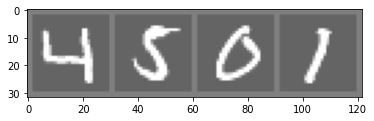

In [0]:
# Some example images from the MNIST dataset

#### CIFAR-10
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The images were preprocessed in the original paper by doing global contrast normalization in each color channel followed by ZCA whitening. This follows the technique adopted in the original paper. The network architecture uses 3 convolutional layers each followed by a max-pooling layer. The convolutional layers have 96, 128 and 256 filters. The convolutional layers are followed by 2 fully connected layers having 2048 units each. Dropout was applied to all the network layers with the probability of retaining the unit being *p* = (0.9, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5), starting from the input layer. 
Here we show an example of the images that are found in the training set:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


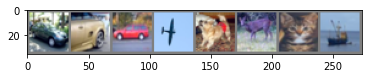

['car', 'car', 'car', 'plane', 'dog', 'deer', 'cat', 'ship']


In [0]:
# Some example images from the CIFAR-10 dataset

To show what dropout means, we tried to apply it to the input layer (i.e. the images) and visualize them. PyTorch has different pre-defined models that are able to do this, the main ones being *Dropout()* and *Dropout2d()*.
When given an input of dimensionality 4 (batch size, #channels, 2d image matrix), the two model behave in a similar but diverse fashion.
This first example shows how *Dropout()* drops each pixel **in each channel** with probability *p*, therefore creating the visualization below:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


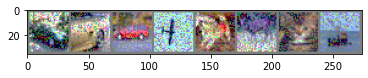

In [0]:
# The same images with Dropout (p = 0.33)

On the other hand, *Dropout2d* drops **entire channels** with probability *p*, therefore creating the following images, where dropped channels changed the overall color of many pictures. In particular, the last image disappeared because sampling from the Bernoulli distribution zeroed-out all three channels.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


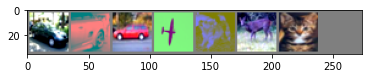

In [0]:
# The same images with Dropout2d (p = 0.33)

## Architecture

We maintained four networks in total, just as in the original paper. Two MNIST networks with Bernoulli and Gaussian dropout and two CIFAR-10 networks with Bernoulli and Gaussian dropout. The architecture of the respective networks are described below.


#### MNIST

For the MNIST network, we utilized a Gaussian distribution for the weight initialization. In addition to this, we used a learning rate scheduler with a gamma of 0.5 with an initial learning rate of 0.001. Although we initially tried to match the initial learning rate and learning rate decay used in the paper, we found that too high of a learning rate can cause numerical instability and introduce NAN's into the tensors which eventually leads to an NAN loss value over time. Since the paper's networks were originally programmed using Tensorflow, it is to be expected that there will be slight differences in implementation; both in our implementation of the network, and Pytorch's implementation of certain algorithms.

The following code describes how weights are initialized for MNIST.

In [0]:
def init_weights(m):
    if type(m) == nn.Linear:
        # This may need to be changed to just normal_
        nn.init.xavier_normal_(m.weight)
        # Constant Bias
        m.bias.data.fill_(0.01)

And the learning and dropout rates as well as other parameters used for the network.

In [0]:
learning_rate = 0.001
momentum = 0.9
dropout_rate_hidden = 0.5
dropout_rate_input = 0.2

We impelements our own Bernoulli and Gaussian Dropout classes to use in the network. One thing to note is that Pytorch has its own implementation of Bernoulli dropout which we took advantage of for our experiments instead. This did not result in any significant difference in performance.

In [0]:
class BernoulliDropout(nn.Module):
    def __init__(self, p=0.5):
        super(BernoulliDropout, self).__init__()
        if p < 0 or p > 1:
            raise ValueError("dropout probability has to be between 0 and 1, "
                             "but got {}".format(p))
        self.p = p
        
    def forward(self, x):
        binomial = torch.distributions.binomial.Binomial(probs=self.p)
        return x * binomial.sample(x.size())

In [0]:
class GaussianDropout(nn.Module):
    def __init__(self, p=0.5):
        super(GaussianDropout, self).__init__()
        alpha = p/(1-p)
        self.alpha = torch.Tensor([alpha])
        
    def forward(self, x):
#       Sample noise   e ~ N(1, alpha)
        epsilon = Variable(torch.randn(x.size()) * self.alpha + 1)
        if use_gpu:
            epsilon = epsilon.cuda()
        return x * epsilon

In the network class below, you can find the code for the architecture of the MNIST network with dropout. To use Bernoulli dropout, you can comment out the lines containing Gaussian dropout and uncomment the lines containing ```nn.Dropout```.

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        #self.do1 = nn.Dropout(p=dropout_rate_hidden) 
        #self.do2 = nn.Dropout(p=dropout_rate_input)

        self.do1 = GaussianDropout(dropout_rate_hidden)
        self.do2 = GaussianDropout(dropout_rate_input)
        
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 10)

    def forward(self, x):
        x = self.do2(x.view(-1,28*28))
        x = F.relu(self.fc1(self.do1(x)))
        x = F.relu(self.fc2(self.do1(x)))
        x = self.fc3(x)
        return x

We set up our optimizer and train our MNIST network using the following code. While the number of epochs can be modified, the model generally begins to converge around 2 epochs. In order to visualize our model and the training loss, we write to Tensorboard indicated by ```SummaryWriter```.

In [0]:
net = Net()
net.apply(init_weights)

if use_gpu:
    net = net.cuda()


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.5)

writer = SummaryWriter('runs/mnist_experiment')
images, labels = next(iter(mnist_trainloader))
grid = torchvision.utils.make_grid(images)

writer.add_image('images', grid)
writer.add_graph(net, images)

for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(mnist_trainloader, 0):
        # get the inputs
        inputs, labels = data
        if use_gpu:
            inputs = inputs.cuda()
            labels = labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            writer.add_scalar('MNIST training loss', running_loss / 1000, epoch + 1) 
            running_loss = 0.0
            niter = epoch * len(mnist_trainloader) + i
    scheduler.step()
print('Finished Training')

#### CIFAR-10

For the CIFAR-10 network, we used Global contrast normalisation and then ZCA whitening for preprocessing.
To match the paper, we utilized a uniform distribution for weight initialization. In particular, following the work of "*Understanding the difficulty of training deep feedforward neural networks*" by Glorot et al., we fill in the tensors with values sampled from $\mathit{U}(-a, a)$, where 

$a = \mathrm{gain} \cdot \sqrt{\frac{6}{\mathrm{fan\_in} + \mathrm{fan\_out}}} $

This is also known as Glorot initialization.

In [0]:
def init_weights(m):
    if type(m) == nn.Linear:
        #weight initialisation
        # this returns the recommended gain for the given non linearity
        nn.init.xavier_uniform_(m.weight, gain=nn.init.calculate_gain('relu'))
        #constant bias.
        m.bias.data.fill_(-0.05)
    if type(m) == nn.Conv2d:
        #weight initialisation
        nn.init.xavier_uniform_(m.weight, gain = nn.init.calculate_gain('relu'))
        #constant bias
        m.bias.data.fill_(-0.05)

Next, we present the code for Global Contrast normalization, which is done on the dataset during the loading phase.

In [0]:
transform =transforms.Compose(    [      
    transforms.ToTensor(),  # Dataset images are in Pillow format, but we need them as tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2427, 0.2392, 0.2559))
    ])
trainSet = torchvision.datasets.CIFAR10(
    root='./data',  # where the dataset is/will be stored
    train=True,  # creates the dataset FROM the train set
    download=True,  # If True, downloads the dataset from the internet
    transform=transform)

Moreover, here's the code for ZCA whitening. ZCA whitening means that we
mean center the data, rotate it onto its principle components, normalize each component and then rotate it back.

In [0]:
def zca(inputs):
    initial_shape = inputs.shape
    inputs=inputs.reshape(initial_shape[0],-1) # flattening

    X = inputs
    X = X - X.mean(axis=0)
  # compute the covariance of the image data

    cov = np.cov(X, rowvar=True)   # cov is (N, N)
  # singular value decomposition
    U,S,V = np.linalg.svd(cov)     # U is (N, N), S is (N,)
  # build the ZCA matrix
    epsilon = 1e-15
    zca_matrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))
  # transform the image data       zca_matrix is (N,N)
    zca = np.dot(zca_matrix,X)    # zca is (N, 3072)
    return zca.reshape(initial_shape)

Finally, after trying different algorithms and a variety of hyperparameters, we used SGD with the following hyperparameters.
Our experiments showed that batch size, learning rate and number of epochs are the most important parameters to achieve big improvements in accuracy and training speed. 200 epochs are not enough to reach the baseline accuracy, but it allowed us to test many different model architectures and hyperparameters.
For the loss, we used cross entropy like in the orginal paper.

In [0]:
criterion = nn.CrossEntropyLoss()
batch_size = 100
lr = 0.002
momentum = 0.8
weight_decay = 0.001
number_of_epochs = 200

## Results and Evaluation

In the following section, we discuss the results of our networks. Although we didn't expect to get the same exact values, we believed that there would be a somewhat similar trend in differences between Bernoulli and Gaussian dropout found in the original paper.

#### MNIST

The following are the classification error results for our MNIST network which is averaged across 10 runs. The code used for running the tests can be found below.

| Dataset  | Architecture  | Bernoulli dropout  | Gaussian dropout  | Without dropout |
|:---:|:---:|:---:|:---:|:---:|
| MNIST | 2 layers, 1024 units each | 7.567% ± 0.327% | 6.386% ± 0.324% | 3.18% ± 0.433 |

<p align="center">
Table 3: Comparison of classification error % with Bernoulli and Gaussian dropout in reproduced experiments
</p>

As can be seen, there is a consistently higher accuracy of more than 1% for Gaussian dropout when compared with Bernoulli dropout. However, when comparing with the results of the paper, the accuracy is lower for the respective techniques. As mentioned in previous sections, we used Pytorch, so there is potential for differences in Pytorch's implementations of algorithms to affect our accuracies. Interestingly enough, we found that for MNIST, the error was lower without dropout. Since the authors did not include the recorded measures for the networks without dropout, we are unable to determine how the author's work compares for networks without dropout.

#### CIFAR-10

The following are the classification accuracy results for our CIFAR-10 network which is averaged across 5 runs. This shows that for our model, Bernoulli is the one performing the best, with Gaussian doing worse than the network with no dropout.

In addition, we decided to try and add Batch Normalization to our network, which normalizes the output of **all** layers *before* the activation functions. For batch normalization, we used the pre-defined PyTorch model ```torch.nn.BatchNorm2d(num_features=..)```. However, this does not seem to increase the performance of the models.

We believe that by training for a longer time, we could be able to achieve higher accuracies.

| Dataset  | Architecture  | Bernoulli dropout  | Gaussian dropout  | Without dropout |
|:---:|:---:|:---:|:---:|:---:|
| CIFAR-10 | 3 conv + 2 fully connected layers | 16.42% ± 0.511% | 23.29% ± 0.701% | 22.02% ± 0.433% |
| CIFAR-10 | Same with Batch Normalization | 17.00% ± 0.567% | 23.94% ± 0.501% |  |

<p align="center">
Table 4: Comparison of classification accuracy with Bernoulli and Gaussian dropout in reproduced experiments, and comparison to batch normalization
</p>



## Conclusion

As reported in previous sections, for MNIST, the use of Gaussian dropout results in a 1% improvement over Bernoulli dropout with no overlapping values in test error.
For CIFAR-10, Bernoulli seems to be performing the best with 7% improvement, given the limited amount of training time we could give our models.

These results do not match Table 10 of the Dropout paper where Gaussian dropout performed better in both cases. However, this could be as a result of differences in implementation previously mentiones.

## Appendix

### Testing MNIST network

In [0]:
mnist_testSet = torchvision.datasets.MNIST(
    root='../data',
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))])
)

mnist_testLoader = torch.utils.data.DataLoader(
    mnist_testSet,
    batch_size=batch_size_train,
    shuffle=False,
    num_workers=0
)

total = 0
correct = 0
print(len(testLoader))
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        if use_gpu:
            images = images.cuda()
            labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: ' + str(
    100 * correct / total) + "%")

### CIFAR-10 network

Here's an example of the CIFAR-10 model with Bernoulli dropout. The other models are very similar to this one.

In [0]:
class Net(nn.Module):  # Module is the base class for all neural network modules

    def __init__(self):
         
        super(Net, self).__init__()
        
        # Dropout2d randomly zero out entire channels
        # every channel will be zeroed out independently on every forward call 
        self.do1 = nn.Dropout(p=0.1)
        self.do2 = nn.Dropout(p=0.25)
        self.do3 = nn.Dropout(p=0.5)
        self.do4 = nn.Dropout(p=0.5)
        
        self.conv1 = nn.Conv2d(
            3, # IN channels
            96, # OUT channels
            5, # kernel size
            padding = 2, # The amount of implicit zero-paddings on both sides
            stride = 1 # 1 is already the default but it's better to specify it
        )

        self.conv2 = nn.Conv2d(96, 128, 5, padding = 2, stride = 1)
        self.conv3 = nn.Conv2d(128,256, 5, padding = 2, stride = 1)
        self.fc1 = nn.Linear(2304, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024,10)
        self.pool = nn.MaxPool2d(3, 2)
        
        
    def forward(self, x):
        x = self.do1(x)
        x = self.do2(self.pool(F.relu(self.conv1(x))))
        x = self.do2(self.pool(F.relu(self.conv2(x))))
        x = self.do3(self.pool(F.relu(self.conv3(x))))
        x = x.view(-1, 2304)
        x = self.do4(F.relu(self.fc1(x)))
        x = self.do4(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x